## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\MCUT\anaconda3\envs\class\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MCUT\anaconda3\envs\class\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MCUT\anaconda3\envs\class\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MCUT\anaconda3\envs\class\lib\site-packag

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x) 
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'categorical_crossentropy', metrics = ["accuracy"], optimizer=optimizer)

In [10]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.8543 - acc: 0.3362 - val_loss: 1.7637 - val_acc: 0.3501
Epoch 2/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.6355 - acc: 0.4209 - val_loss: 1.7324 - val_acc: 0.3851
Epoch 3/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.5506 - acc: 0.4512 - val_loss: 1.5578 - val_acc: 0.4477
Epoch 4/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.4931 - acc: 0.4719 - val_loss: 1.5452 - val_acc: 0.4570
Epoch 5/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4412 - acc: 0.4898 - val_loss: 1.4894 - val_acc: 0.4670
Epoch 6/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4015 - acc: 0.5003 - val_loss: 1.4659 - val_acc: 0.4823
Epoch 7/500
50000/50000 [==============================] - 2s 38us/step - 

Epoch 58/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.3137 - acc: 0.8883 - val_loss: 2.2284 - val_acc: 0.5221
Epoch 59/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.3121 - acc: 0.8900 - val_loss: 2.2183 - val_acc: 0.5299
Epoch 60/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2951 - acc: 0.8965 - val_loss: 2.2478 - val_acc: 0.5353
Epoch 61/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2673 - acc: 0.9064 - val_loss: 2.2715 - val_acc: 0.5388
Epoch 62/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2654 - acc: 0.9081 - val_loss: 2.5218 - val_acc: 0.5099
Epoch 63/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.2720 - acc: 0.9047 - val_loss: 2.3238 - val_acc: 0.5377
Epoch 64/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.2486 - acc: 0.9122 - val_loss: 2.4159 - val_acc: 0.5308
Epoch 65/500
50000/50000 [=

Epoch 117/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0996 - acc: 0.9648 - val_loss: 3.6090 - val_acc: 0.5350
Epoch 118/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0913 - acc: 0.9682 - val_loss: 3.5127 - val_acc: 0.5381
Epoch 119/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0731 - acc: 0.9743 - val_loss: 3.6613 - val_acc: 0.5297
Epoch 120/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0787 - acc: 0.9723 - val_loss: 3.5646 - val_acc: 0.5367
Epoch 121/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0534 - acc: 0.9822 - val_loss: 3.7260 - val_acc: 0.5311
Epoch 122/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0690 - acc: 0.9763 - val_loss: 3.7006 - val_acc: 0.5261
Epoch 123/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0753 - acc: 0.9737 - val_loss: 3.6792 - val_acc: 0.5403
Epoch 124/500
50000/

50000/50000 [==============================] - 2s 41us/step - loss: 0.0698 - acc: 0.9754 - val_loss: 4.2964 - val_acc: 0.5189
Epoch 176/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0929 - acc: 0.9685 - val_loss: 4.2755 - val_acc: 0.5200
Epoch 177/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0734 - acc: 0.9746 - val_loss: 4.1482 - val_acc: 0.5282
Epoch 178/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0739 - acc: 0.9745 - val_loss: 4.0303 - val_acc: 0.5357
Epoch 179/500
50000/50000 [==============================] - 2s 38us/step - loss: 0.0608 - acc: 0.9794 - val_loss: 4.0511 - val_acc: 0.5340
Epoch 180/500
50000/50000 [==============================] - 2s 40us/step - loss: 0.0444 - acc: 0.9849 - val_loss: 3.9781 - val_acc: 0.5405
Epoch 181/500
50000/50000 [==============================] - 2s 39us/step - loss: 0.0363 - acc: 0.9880 - val_loss: 4.1066 - val_acc: 0.5397
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 2s 39us/step - loss: 1.4190e-04 - acc: 1.0000 - val_loss: 4.2084 - val_acc: 0.5589
Epoch 233/500
50000/50000 [==============================] - 2s 40us/step - loss: 1.4101e-04 - acc: 1.0000 - val_loss: 4.2107 - val_acc: 0.5589
Epoch 234/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.3782e-04 - acc: 1.0000 - val_loss: 4.2104 - val_acc: 0.5585
Epoch 235/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.3716e-04 - acc: 1.0000 - val_loss: 4.2134 - val_acc: 0.5587
Epoch 236/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.3671e-04 - acc: 1.0000 - val_loss: 4.2137 - val_acc: 0.5585
Epoch 237/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.3513e-04 - acc: 1.0000 - val_loss: 4.2151 - val_acc: 0.5601
Epoch 238/500
50000/50000 [==============================] - 2s 39us/step - loss: 1.3312e-04 - acc: 1.0000 - val_loss: 4.2159 - val_acc: 0.5590
Epoch 

Epoch 289/500
50000/50000 [==============================] - 2s 40us/step - loss: 9.0874e-05 - acc: 1.0000 - val_loss: 4.2680 - val_acc: 0.5589
Epoch 290/500
50000/50000 [==============================] - 2s 38us/step - loss: 9.0882e-05 - acc: 1.0000 - val_loss: 4.2677 - val_acc: 0.5587
Epoch 291/500
50000/50000 [==============================] - 2s 38us/step - loss: 8.9854e-05 - acc: 1.0000 - val_loss: 4.2697 - val_acc: 0.5589
Epoch 292/500
50000/50000 [==============================] - 2s 38us/step - loss: 8.9733e-05 - acc: 1.0000 - val_loss: 4.2697 - val_acc: 0.5590
Epoch 293/500
50000/50000 [==============================] - 2s 39us/step - loss: 8.8854e-05 - acc: 1.0000 - val_loss: 4.2695 - val_acc: 0.5585
Epoch 294/500
50000/50000 [==============================] - 2s 41us/step - loss: 8.8686e-05 - acc: 1.0000 - val_loss: 4.2712 - val_acc: 0.5585
Epoch 295/500
50000/50000 [==============================] - 2s 40us/step - loss: 8.8089e-05 - acc: 1.0000 - val_loss: 4.2719 - val_acc:

Epoch 346/500
50000/50000 [==============================] - 2s 39us/step - loss: 6.9207e-05 - acc: 1.0000 - val_loss: 4.3022 - val_acc: 0.5589
Epoch 347/500
50000/50000 [==============================] - 2s 38us/step - loss: 6.9230e-05 - acc: 1.0000 - val_loss: 4.3020 - val_acc: 0.5584
Epoch 348/500
50000/50000 [==============================] - 2s 37us/step - loss: 6.8722e-05 - acc: 1.0000 - val_loss: 4.3028 - val_acc: 0.5590
Epoch 349/500
50000/50000 [==============================] - 2s 37us/step - loss: 6.8485e-05 - acc: 1.0000 - val_loss: 4.3037 - val_acc: 0.5588
Epoch 350/500
50000/50000 [==============================] - 2s 37us/step - loss: 6.8367e-05 - acc: 1.0000 - val_loss: 4.3035 - val_acc: 0.5579
Epoch 351/500
50000/50000 [==============================] - 2s 37us/step - loss: 6.7866e-05 - acc: 1.0000 - val_loss: 4.3044 - val_acc: 0.5583
Epoch 352/500
50000/50000 [==============================] - 2s 38us/step - loss: 6.7742e-05 - acc: 1.0000 - val_loss: 4.3052 - val_acc:

Epoch 403/500
50000/50000 [==============================] - 2s 37us/step - loss: 5.6639e-05 - acc: 1.0000 - val_loss: 4.3281 - val_acc: 0.5579
Epoch 404/500
50000/50000 [==============================] - 2s 37us/step - loss: 5.6357e-05 - acc: 1.0000 - val_loss: 4.3278 - val_acc: 0.5581
Epoch 405/500
50000/50000 [==============================] - 2s 38us/step - loss: 5.6309e-05 - acc: 1.0000 - val_loss: 4.3283 - val_acc: 0.5577
Epoch 406/500
50000/50000 [==============================] - 2s 40us/step - loss: 5.6088e-05 - acc: 1.0000 - val_loss: 4.3291 - val_acc: 0.5579
Epoch 407/500
50000/50000 [==============================] - 2s 39us/step - loss: 5.5941e-05 - acc: 1.0000 - val_loss: 4.3298 - val_acc: 0.5580
Epoch 408/500
50000/50000 [==============================] - 2s 39us/step - loss: 5.5884e-05 - acc: 1.0000 - val_loss: 4.3298 - val_acc: 0.5582
Epoch 409/500
50000/50000 [==============================] - 2s 38us/step - loss: 5.5611e-05 - acc: 1.0000 - val_loss: 4.3299 - val_acc:

Epoch 460/500
50000/50000 [==============================] - 2s 39us/step - loss: 4.8280e-05 - acc: 1.0000 - val_loss: 4.3490 - val_acc: 0.5575
Epoch 461/500
50000/50000 [==============================] - 2s 37us/step - loss: 4.8137e-05 - acc: 1.0000 - val_loss: 4.3487 - val_acc: 0.5575
Epoch 462/500
50000/50000 [==============================] - 2s 38us/step - loss: 4.8028e-05 - acc: 1.0000 - val_loss: 4.3497 - val_acc: 0.5578
Epoch 463/500
50000/50000 [==============================] - 2s 37us/step - loss: 4.7838e-05 - acc: 1.0000 - val_loss: 4.3500 - val_acc: 0.5574
Epoch 464/500
50000/50000 [==============================] - 2s 39us/step - loss: 4.7824e-05 - acc: 1.0000 - val_loss: 4.3499 - val_acc: 0.5574
Epoch 465/500
50000/50000 [==============================] - 2s 38us/step - loss: 4.7644e-05 - acc: 1.0000 - val_loss: 4.3509 - val_acc: 0.5577
Epoch 466/500
50000/50000 [==============================] - 2s 38us/step - loss: 4.7537e-05 - acc: 1.0000 - val_loss: 4.3508 - val_acc:

Duplicate key in file 'C:\\Users\\MCUT\\anaconda3\\envs\\class\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc' line #250.


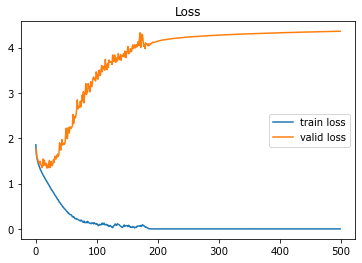

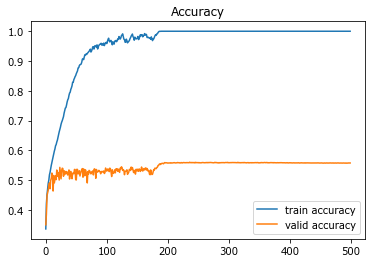

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()